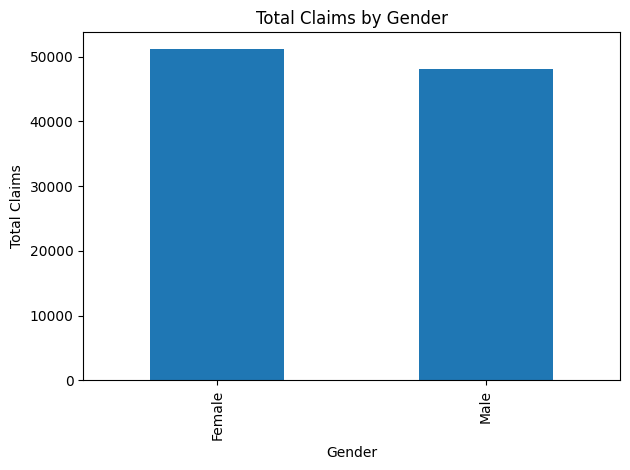

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("historical_data.csv")

# Total claims = past claims + current claims
df["total_claims"] = df["pastclaims"] + df["claims"]

# Map gender 1/0 to labels
df["gender_label"] = df["gender"].map({1: "Male", 0: "Female"})

# Aggregate by gender label
claims_by_gender = df.groupby("gender_label")["total_claims"].sum()

# Plot
plt.figure()
claims_by_gender.plot(kind="bar")
plt.title("Total Claims by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()


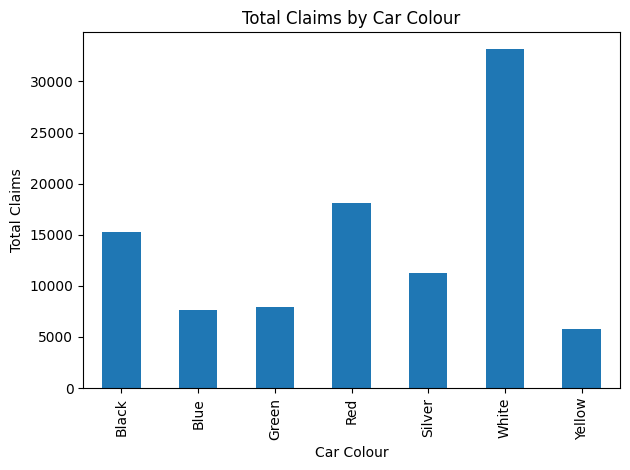

In [2]:
claims_by_car_colour = df.groupby("carcolour")["total_claims"].sum()
plt.figure()
claims_by_car_colour.plot(kind="bar")
plt.title("Total Claims by Car Colour")
plt.xlabel("Car Colour")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()

In [4]:
import geopandas as gp

In [15]:
shapefile_path = 'Province.shp'
gdf = gp.read_file(shapefile_path)


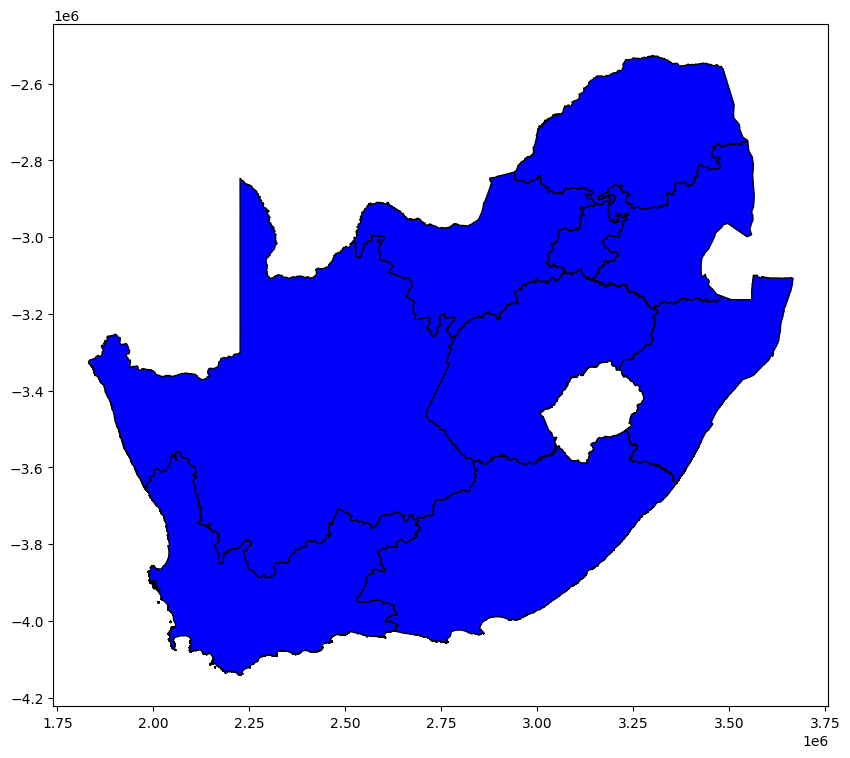

In [16]:
fix, ax = plt.subplots(1, 1, figsize=(10,10))
gdf.plot(ax=ax, color="blue", edgecolor="black")
plt.show()

In [17]:
gdf.columns

Index(['CODE', 'PROVINCE', 'Area', 'Shape_Leng', 'Shape_Le_1', 'Shape_Area',
       'geometry'],
      dtype='object')

In [18]:
print(gdf['PROVINCE'].unique())


['Eastern Cape' 'Free State' 'Gauteng' 'KwaZulu-Natal' 'Limpopo'
 'Mpumalanga' 'North West' 'Northern Cape' 'Western Cape']


In [19]:
df["province"].unique()

array(['MP', 'GP', 'WC', 'LIM', 'EC', 'FS', 'NW', 'KZN', 'NC'],
      dtype=object)

In [ ]:
province_map = {
    "MP":  "Mpumalanga",
    "GP":  "Gauteng",
    "WC":  "Western Cape",
    "LIM": "Limpopo",
    "EC":  "Eastern Cape",
    "FS":  "Free State",
    "NW":  "North West",
    "KZN": "KwaZulu-Natal",
    "NC":  "Northern Cape",
}


In [21]:
df["total_claims"] = df["pastclaims"] + df["claims"]
df["province_full"] = df["province"].map(province_map)

claims_per_province = (
    df.groupby("province_full")["total_claims"]
      .sum()
      .reset_index()
)


In [22]:
gdf = gp.read_file("Province.shp")

merged = gdf.merge(
    claims_per_province,
    left_on="PROVINCE",
    right_on="province_full",
    how="left"
)


<Figure size 1500x1500 with 0 Axes>

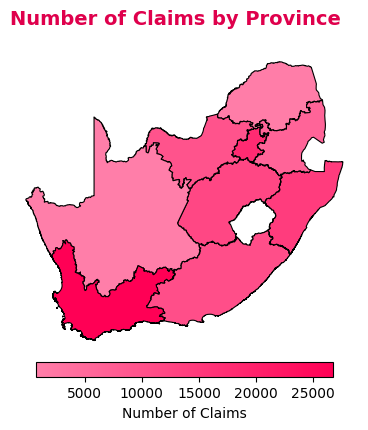

In [40]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

base_color = "#ff0055"
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_blues", ["#ff7ea9", base_color]
)

plt.figure(figsize=(15,15))
merged.plot(
    column="total_claims",
    cmap=cmap,
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Number of Claims",      # Legend Title
        "orientation": "horizontal",  # Horizontal legend
        "shrink": 0.6,                # Optional: reduce size
        "pad": 0.02                   # Optional: spacing
    }
)

plt.title("Number of Claims by Province", fontsize=14, color="#df004c", loc="left", fontweight="bold")
plt.axis("off")
plt.show()
